In [1]:
from rsi import rsi_model
import pandas as pd

# Colecting data

In [2]:
stock_list = ['AMD', 'TSLA', 'AAPL', 'F', 'AAL', 'NVDA', 'PFE', 'INTC', 'KEY',
       'BAC', 'CCL', 'AMZN', 'T', 'KMI', 'PYPL', 'BA', 'UBER', 'MSFT',
       'XOM', 'HBAN', 'GOOG', 'BMY', 'META', 'TFC', 'WFC', 'GM', 'CSX',
       'CVS', 'VZ', 'PCG', 'MMM']

In [3]:
test_list = []
errors = []
stop_loss_list = [3,7,14,21,30]

for stock in stock_list:
    for stop_loss in stop_loss_list:

        try:
            test = rsi_model(stock, stop_loss)

            results = {'Stock' : stock, 'Stop loss' : stop_loss, 'Buy n hold' : test[0], 'Long position return' : test[1], 
                       'Short position return' : test[2], 'Average return' : test[3]}

            test_list.append(results)

        except:
            errors.append({stock:stop_loss})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

# Making main_df and error_df 

In [4]:
test_df = pd.DataFrame(test_list)

In [5]:
test_df.sample(5)

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return
84,UBER,30,58.240470,41.896524,299.182082,170.539303
16,F,7,72.608501,-67.524703,-81.907709,-74.716206
7,TSLA,14,14107.125531,1910.081420,-88.396829,910.842296
105,BMY,3,302.263304,698.196854,-8.807471,344.694692
39,INTC,30,174.707251,510.054077,-5.629639,252.212219


In [6]:
errors_keys = []
errors_values = []

for error in errors:
    errors_keys.append(list(error.keys())[0])
    errors_values.append(list(error.values())[0])

In [7]:
error_df = pd.DataFrame()
error_df['Stocks'] = errors_keys
error_df['Stop loss'] = errors_values

error_df.head()

,Stocks,Stop loss


# Analysis

In [8]:
per_error = len(error_df) / (len(error_df) + len(test_df))

print(f'Error fee: {round(per_error*100,2)}%')

Error fee: 0.0%


In [9]:
test_df.head()

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return
0,AMD,3,1080.609423,832.028844,-96.940469,367.544187
1,AMD,7,1080.609423,832.028844,-96.940469,367.544187
2,AMD,14,1080.609423,832.028844,-96.940469,367.544187
3,AMD,21,1080.609423,832.028844,-96.940469,367.544187
4,AMD,30,1080.609423,832.028844,-96.940469,367.544187


In [10]:
# Long position vs Buy and hold
test_df['LP vs BH (%)'] = ((test_df['Long position return'] / test_df['Buy n hold']) - 1) * 100

# Short position vs Buy and hold
test_df['SP vs BH (%)'] = ((test_df['Short position return'] / test_df['Buy n hold']) - 1) * 100

# Average return vs Buy and hold
test_df['Avg vs BH (%)'] = ((test_df['Average return'] / test_df['Buy n hold']) - 1) * 100

In [11]:
round(test_df.sample(10),2)

,Stock,Stop loss,Buy n hold,Long position return,Short position return,Average return,LP vs BH (%),SP vs BH (%),Avg vs BH (%)
119,TFC,30,108.14,94.37,303.48,198.92,-12.74,180.63,83.95
118,TFC,21,108.14,94.37,303.48,198.92,-12.74,180.63,83.95
27,NVDA,14,39538.01,-62.48,-99.86,-81.17,-100.16,-100.25,-100.21
63,T,21,320.38,101.56,-61.68,19.94,-68.30,-119.25,-93.78
85,MSFT,3,2473.08,97.08,-96.87,0.11,-96.07,-103.92,-100.00
67,KMI,14,6.15,-18.53,51.12,16.29,-401.61,731.82,165.10
92,XOM,14,373.44,-1.96,54.13,26.09,-100.52,-85.50,-93.01
100,GOOG,3,4762.35,170.71,-96.95,36.88,-96.42,-102.04,-99.23
131,CSX,7,2917.94,977.39,-83.63,446.88,-66.50,-102.87,-84.69
57,AMZN,14,7617.05,46.58,-93.37,-23.40,-99.39,-101.23,-100.31


In [12]:
return_df = test_df.groupby('Stop loss')[['Buy n hold', 'Long position return', 'Short position return', 'Average return']].mean()
round(return_df, 2)

,Buy n hold,Long position return,Short position return,Average return
Stop loss,,,,
3,3944.54,233.8,99.55,166.67
7,3944.54,233.8,99.55,166.67
14,3944.54,233.8,99.55,166.67
21,3944.54,233.8,99.55,166.67
30,3944.54,233.8,99.55,166.67


In [13]:
compare_df = test_df.groupby('Stop loss')[['LP vs BH (%)', 'SP vs BH (%)', 'Avg vs BH (%)']].mean()
compare_df

,LP vs BH (%),SP vs BH (%),Avg vs BH (%)
Stop loss,,,
3,136.92465,-446.1758,-154.625575
7,136.92465,-446.1758,-154.625575
14,136.92465,-446.1758,-154.625575
21,136.92465,-446.1758,-154.625575
30,136.92465,-446.1758,-154.625575


<Axes: xlabel='Stop loss'>

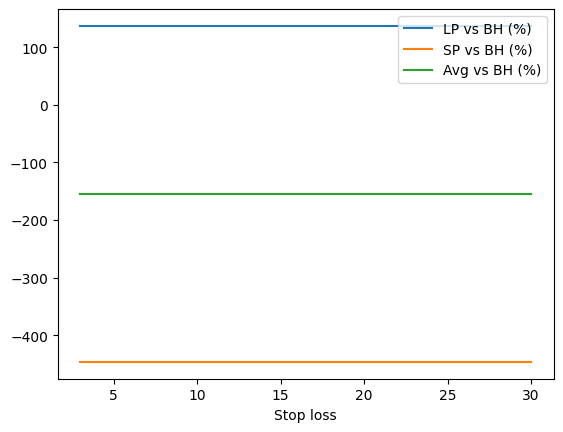

In [14]:
compare_df[['LP vs BH (%)', 'SP vs BH (%)', 'Avg vs BH (%)']].plot()

In [15]:
test_df.to_excel('../../return_data/rsi.xlsx')